In [56]:
# Andrew Lesak 8/13/21 - Notebook to get linear fits of lock signal and analyze long term lock behavior

Slope = 16.77 mV/MHz
Noise Mean = -0.686 mV
Noise RMS = 3.709 mV
Slope/Noise RMS = 4.521


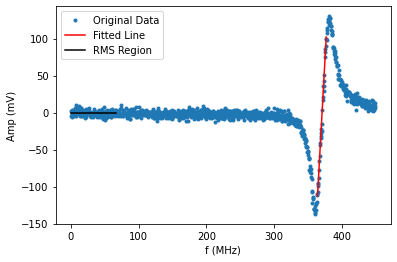

In [454]:
# 9/13/21 - automates linear fits of lock signal & calculates RMS of noise

import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Time', 'Amp']
var=r'C:\Users\LASERSTATION\Desktop\423LockOpt\10-29-21\sig001.csv'

#conversion from time to freq axis (MHz/ms). Check semi-regularly
#obtained using wavemeter and checking frequency at the extrema piezo voltages during the 50 ms scan. conv = Δf/50 ms
conv = 9

# full lock sig
LockSigFull = pd.read_csv (var,sep = ';',header=0,usecols=[0,1],names=headers)   
AmpFull = 1000*LockSigFull.Amp
TimeFull = conv*LockSigFull.Time

# select only linear portion of lock sig and fit:
# loop finds max slope of a linear region of defined width
width = 30
i = 1
m = 0
b = 0
while i<1000:
    LockSigLinTest = pd.read_csv (var,sep = ';',header=0,usecols=[0,1],names=headers,skiprows=i,nrows=width)   
    AmpLinTest = 1000*LockSigLinTest.Amp
    TimeLinTest = conv*LockSigLinTest.Time
    LinRegTest = stats.linregress(TimeLinTest, AmpLinTest)
    a = LinRegTest.slope 
    if a >= m:
        m = a
        b = LinRegTest.intercept
        n = i 
        LockSigLin = pd.read_csv (var,sep = ';',header=0,usecols=[0,1],names=headers,skiprows=n,nrows=width)   
        AmpLin = 1000*LockSigLin.Amp
        TimeLin = conv*LockSigLin.Time      
    i += 1

print("Slope =",round(m,3), "mV/MHz")

# calculate RMS of noise
LockSigRMS = pd.read_csv (var,sep = ';',header=0,usecols=[0,1],names=headers,skiprows=0,nrows=150)  
AmpRMS = 1000*LockSigRMS.Amp
TimeRMS = conv*LockSigRMS.Time
mean = np.mean(AmpRMS)
RMS = np.sqrt(np.mean((AmpRMS-mean)**2))
print("Noise Mean =",round(mean,3),"mV")
print("Noise RMS =",round(RMS,3), "mV")
print("Slope/Noise RMS =",round(m/RMS,3))

plt.xlabel('f (MHz)')
plt.ylabel('Amp (mV)')
plt.plot(TimeFull, AmpFull, '.', label='Original Data')
plt.plot(TimeLin, b + m*TimeLin, 'r', label='Fitted Line')
plt.plot(TimeRMS, mean+TimeRMS*0, 'black', label='RMS Region')
plt.legend()
plt.show()

Slope = 0.982 mV/MHz
Lock Point = 121.397 MHz
Noise Offset = -0.361 mV
Noise RMS = 0.036 mV
Noise RMS/Slope = 0.037 MHz


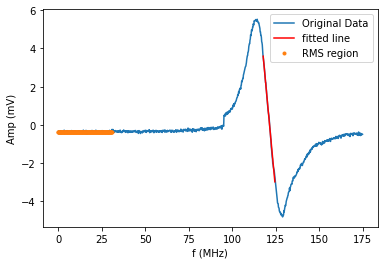

In [455]:
# 9/9/21 - Manually get linear fits of lock signal & calculate RMS of noise

import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Time', 'Amp']
var=r'C:\Users\LASERSTATION\Desktop\Te2LockOpt\2-11-22\sig002-490C-13_7dbm-3000uWP-4800uWp.csv'

#conversion from time to freq axis (MHz/ms). Check semi-regularly
#obtained using wavemeter and checking frequency at the extrema piezo voltages during the 50 ms scan. conv = Δf/50 ms
conv = 3.50

# full lock sig
LockSigFull = pd.read_csv (var,sep = ';',header=0,usecols=[0,2],names=headers)   
AmpFull = 1000*LockSigFull.Amp
TimeFull = conv*LockSigFull.Time

# select only linear portion of lock sig and fit
# mannually find value for 'skip rows' so that data starting in linear region is only used
# manually find value of 'nrows' such that entire linear region is selected  
LockSigLin = pd.read_csv (var,sep = ';',header=0,usecols=[0,2],names=headers,skiprows=685,nrows=40)   
AmpLin = 1000*LockSigLin.Amp
TimeLin = conv*LockSigLin.Time

# perform linear regression and find slope in mV/MHz
LinReg = stats.linregress(TimeLin, AmpLin)
print("Slope =",round(abs(LinReg.slope),3), "mV/MHz")

# calculate lock point (determined by frequency at 0V crossing in linear region)
LockPoint = -(LinReg.intercept/LinReg.slope)
print("Lock Point =",round(LockPoint,3),"MHz")

# calculate RMS of noise
LockSigRMS = pd.read_csv (var,sep = ';',header=0,usecols=[0,2],names=headers,skiprows=0,nrows=180)  
AmpRMS = 1000*LockSigRMS.Amp
TimeRMS = conv*LockSigRMS.Time
mean = np.mean(AmpRMS)
RMS = np.sqrt(np.mean((AmpRMS-mean)**2))
print("Noise Offset =",round(mean,3),"mV")
print("Noise RMS =",round(RMS,3), "mV")
print("Noise RMS/Slope =",round(abs(RMS/LinReg.slope),3),"MHz")

#plt.xlim(80,102)
plt.xlabel('f (MHz)')
plt.ylabel('Amp (mV)')
plt.plot(TimeFull, AmpFull, '-', label='Original Data')
plt.plot(TimeLin, LinReg.intercept + LinReg.slope*TimeLin, 'r', label='fitted line')
plt.plot(TimeRMS, mean+TimeRMS*0, '.', label='RMS region')
plt.legend()
plt.show()

Mean Freq: 115.4 MHz
RMS Freq: 0.87 MHz


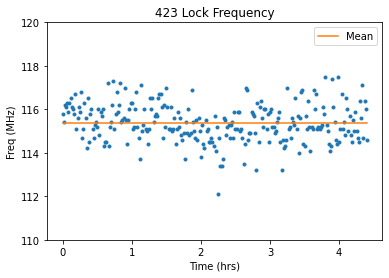

In [385]:
#long time 423 lock frequency

import numpy as np
import pandas as pd
import datetime
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Freq','Time']
var=r'C:\Users\LASERSTATION\Desktop\423LockOpt\test\longtimelockfreq.csv'

#full data
SigFull = pd.read_csv (var,header=0,usecols=[2,3],names=headers,skiprows=0)   
FreqFull = (SigFull.Freq - 709.0783730)*10**6
TimeFull = SigFull.Time

#locked portion
SigLock = pd.read_csv (var,header=0,usecols=[2,3],names=headers,skiprows=0,nrows=265)   
FreqLock = (SigLock.Freq - 709.0783730)*10**6
TimeLock = SigLock.Time

#calculate mean and RMS laser lock freq for each scenario
MeanLock = np.mean(FreqLock)
RMSLock = np.sqrt(np.mean((FreqLock-MeanLock)**2))
print("Mean Freq:",round(MeanLock,1),"MHz")
print("RMS Freq:",round(RMSLock,2),"MHz")

#plot original data
plt.xlabel('Time (hrs)')
plt.ylabel('Freq (MHz)')
#plt.plot(TimeFull/3600,FreqFull, '.', label='')

#plot locked portion
plt.plot(TimeLock/3600,FreqLock,'.',label='')
plt.plot(TimeLock/3600, MeanLock + 0*TimeLock, '-', label='Mean')
plt.ylim([110,120])
plt.title("423 Lock Frequency")
plt.legend()
plt.show()

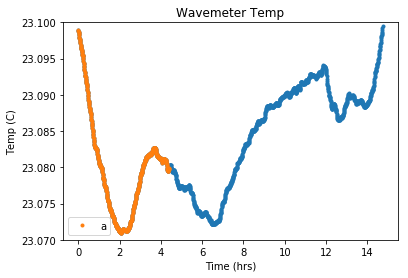

In [609]:
#long time wavemeter box lock frequency
import numpy as np
import pandas as pd
import datetime
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Temp','Time']
var=r'C:\Users\LASERSTATION\Desktop\423LockOpt\test\wavemetertemplock.csv'

#full data
SigFull = pd.read_csv (var,header=0,usecols=[2,3],names=headers,skiprows=0)   
TempFull = SigFull.Temp
TimeFull = SigFull.Time

#locked portion
SigLock = pd.read_csv (var,header=0,usecols=[2,3],names=headers,skiprows=0,nrows=528)   
TempLock = SigLock.Temp
TimeLock = SigLock.Time

#calculate mean and RMS laser lock freq for each scenario
#MeanLock = np.mean(FreqLock)
#RMSLock = np.sqrt(np.mean((FreqLock-MeanLock)**2))
#print("Mean Freq:",round(MeanLock,1),"MHz")
#print("RMS Freq:",round(RMSLock,2),"MHz")

#plot original data
plt.xlabel('Time (hrs)')
plt.ylabel('Temp (C)')
plt.plot(TimeFull/3600,TempFull, '.', label='')

#plot locked portion
plt.plot(TimeLock/3600,TempLock,'.',label='a')
plt.ylim([23.07,23.1])
plt.title("Wavemeter Temp")
plt.legend()
plt.show()

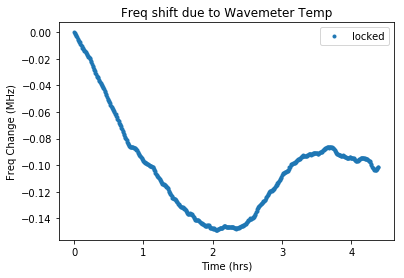

In [783]:
#long time wavemeter box temp -- convert to frequency shift
import numpy as np
import pandas as pd
import datetime
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Time','Freq']
var=r'C:\Users\LASERSTATION\Desktop\423LockOpt\test\wavemetertemplock.csv'

MaxTemp=23.09943213
#full data
SigFull = pd.read_csv (var,header=0,usecols=[3,4],names=headers,skiprows=0)   
TimeFull = SigFull.Time
FreqFull = SigFull.Freq

#locked portion
SigLock = pd.read_csv (var,header=0,usecols=[3,4],names=headers,skiprows=0,nrows=528)   
FreqLockTemp = SigLock.Freq
TimeLock = SigLock.Time

#calculate mean and RMS laser lock freq for each scenario
#MeanLock = np.mean(FreqLock)
#RMSLock = np.sqrt(np.mean((FreqLock-MeanLock)**2))
#print("Mean Freq:",round(MeanLock,1),"MHz")
#print("RMS Freq:",round(RMSLock,2),"MHz")

#plot original data
plt.xlabel('Time (hrs)')
plt.ylabel('Freq Change (MHz)')
#plt.plot(TimeFull/3600,TempFull, '.', label='')

#plot locked portion
plt.plot(TimeLock/3600,FreqLockTemp,'.',label='locked')
#plt.ylim([23.07/MaxTemp*TFconv,23.1/MaxTemp*TFconv])
plt.title("Freq shift due to Wavemeter Temp")
plt.legend()
plt.show()

Mean Freq: 115.5 MHz
RMS Freq: 0.86 MHz


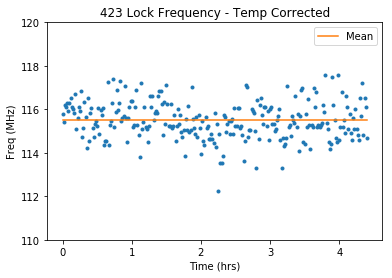

In [781]:
#long time 423 lock frequency with temp corrections

import numpy as np
import pandas as pd
import datetime
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Time','Freq']
var=r'C:\Users\LASERSTATION\Desktop\423LockOpt\test\longtimelockfreq.csv'

#locked portion
SigLock = pd.read_csv (var,header=0,usecols=[3,4],names=headers,skiprows=0,nrows=265)   
FreqLock = SigLock.Freq
TimeLock = SigLock.Time

#calculate mean and RMS laser lock freq for each scenario
MeanLock = np.mean(FreqLock)
RMSLock = np.sqrt(np.mean((FreqLock-MeanLock)**2))
print("Mean Freq:",round(MeanLock,1),"MHz")
print("RMS Freq:",round(RMSLock,2),"MHz")

#plot original data
plt.xlabel('Time (hrs)')
plt.ylabel('Freq (MHz)')
#plt.plot(TimeFull/3600,FreqFull, '.', label='')

#plot locked portion
plt.plot(TimeLock/3600,FreqLock,'.',label='')
plt.plot(TimeLock/3600, MeanLock + 0*TimeLock, '-', label='Mean')
plt.ylim([110,120])
plt.title("423 Lock Frequency - Temp Corrected")
plt.legend()
plt.show()

Slope = 0.833 MHz/hr
r = 0.641
Temp Range: 0.65225
Freq Range: -3.466
Freq/Temp: -5.31379 MHz/C



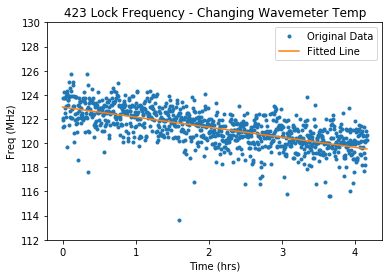

In [759]:
#long time 423 lock frequency 11-19-21

import numpy as np
import pandas as pd
import datetime
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Freq','Time']
var=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-19-21\LockFreqTempChange.csv'

#full data
SigFull = pd.read_csv (var,header=0,usecols=[2,3],names=headers,skiprows=0)   
FreqFull = (SigFull.Freq - 709.0783730)*10**6
TimeFull = SigFull.Time/3600

#calculate mean and RMS laser lock freq for each scenario
#MeanLock = np.mean(FreqLock)
#RMSLock = np.sqrt(np.mean((FreqLock-MeanLock)**2))
#print("Mean Freq:",round(MeanLock,1),"MHz")
#print("RMS Freq:",round(RMSLock,2),"MHz")

# perform linear regression and find slope in mV/MHz
LinReg = stats.linregress(TimeFull, FreqFull)
print("Slope =",round(abs(LinReg.slope),3), "MHz/hr")
print("r =",round(abs(LinReg.rvalue),3))
#plot original data
plt.xlabel('Time (hrs)')
plt.ylabel('Freq (MHz)')
#plt.plot(TimeFull/3600,FreqFull, '.', label='')

#plot full
plt.plot(TimeFull,FreqFull,'.',label='Original Data')
#plot linear fit
plt.plot(TimeFull, LinReg.intercept + LinReg.slope*TimeFull, '-', label='Fitted Line')

TempRange = 23.80224688-23.15
FreqRange = (LinReg.intercept + (14985/3600)*LinReg.slope) - (LinReg.intercept + (0/3600)*LinReg.slope)
TFconv = FreqRange/TempRange
print("Temp Range:",round(TempRange,5))
print("Freq Range:",round(FreqRange,3))
print("Freq/Temp:",round(TFconv,5),"MHz/C")
print()
plt.ylim([112,130])
plt.title("423 Lock Frequency - Changing Wavemeter Temp")
plt.legend()
plt.show()

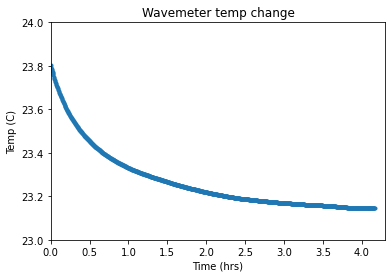

In [448]:
#long time wavemeter box temp 11-19-21
import numpy as np
import pandas as pd
import datetime
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Temp','Time']
var=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-19-21\WavemeterTemp.csv'

#full data
SigFull = pd.read_csv (var,header=0,usecols=[2,3],names=headers,skiprows=0)   
TempFull = SigFull.Temp
TimeFull = SigFull.Time/3600

#plot original data
plt.xlabel('Time (hrs)')
plt.ylabel('Temp (C)')
plt.plot(TimeFull,TempFull, '.', label='')
plt.ylim([23.00,24.0])
plt.xlim([0,4.3])
plt.title("Wavemeter temp change")
b=1.6
plt.show()

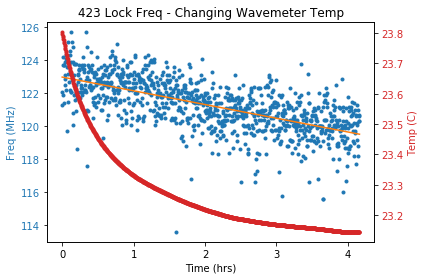

In [750]:
headers1 = ['Freq','Time']
var1=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-19-21\LockFreqTempChange.csv'

#full data
SigFull1 = pd.read_csv (var1,header=0,usecols=[2,3],names=headers1,skiprows=0)   
FreqFull = (SigFull1.Freq - 709.0783730)*10**6
TimeFull = SigFull1.Time/3600

headers2 = ['Temp','Time']
var2=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-19-21\WavemeterTemp.csv'

#full data
SigFull2 = pd.read_csv (var2,header=0,usecols=[2,3],names=headers2,skiprows=0)   
TempFull = SigFull2.Temp
TimeFull = SigFull2.Time/3600

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (hrs)')
ax1.set_ylabel('Freq (MHz)',color=color)
ax1.plot(TimeFull, FreqFull,'.',color=color)
ax1.plot(TimeFull,LinReg.intercept + LinReg.slope*TimeFull, '-', label='Fitted Line',color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Temp (C)',color=color)
ax2.plot(TimeFull, TempFull,'.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("423 Lock Freq - Changing Wavemeter Temp")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

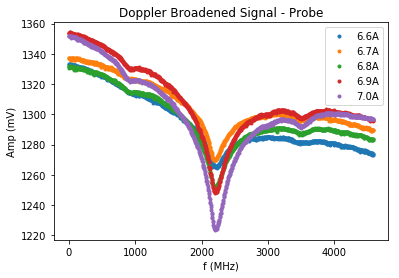

In [860]:
# Andrew Lesak 9/23/21 - 423 Absorption vs oven current. 
# Subtracts background from doppler broadened signal 

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Time', 'Amp']
Dop1=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-29-21\dop001-6-6A.csv'
Dop2=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-29-21\dop001-6-7A.csv'
Dop3=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-29-21\dop001-6-8A.csv'
Dop4=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-29-21\dop001-6-9A.csv'
Dop5=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-29-21\dop001-7-0A.csv'
Bckgrnd=r'C:\Users\LASERSTATION\Desktop\423LockOpt\11-29-21\dopback.csv'
#conversion from time to freq axis (THz/ms). Check semi-regularly
#obtained using wavemeter and checking frequency at the extrema piezo voltages during the 50 ms scan. conv = Δf/50 ms
conv = (2410--2180)/50

# full doppler sig
DopSig1 = pd.read_csv (Dop1,sep = ';',header=0,usecols=[0,1],names=headers)   
AmpSig1 = 1000*DopSig1.Amp
TimeSig1 = conv*DopSig1.Time

DopSig2 = pd.read_csv (Dop2,sep = ';',header=0,usecols=[0,1],names=headers)   
AmpSig2 = 1000*DopSig2.Amp
TimeSig2 = conv*DopSig2.Time

DopSig3 = pd.read_csv (Dop3,sep = ';',header=0,usecols=[0,1],names=headers)   
AmpSig3 = 1000*DopSig3.Amp
TimeSig3 = conv*DopSig3.Time

DopSig4 = pd.read_csv (Dop4,sep = ';',header=0,usecols=[0,1],names=headers)   
AmpSig4 = 1000*DopSig4.Amp
TimeSig4 = conv*DopSig4.Time

DopSig5 = pd.read_csv (Dop5,sep = ';',header=0,usecols=[0,1],names=headers)   
AmpSig5 = 1000*DopSig5.Amp
TimeSig5 = conv*DopSig5.Time

# doppler background
DopBKGRND = pd.read_csv (Bckgrnd,sep = ';',header=0,usecols=[0,1],names=headers)   
AmpBKGRND = 1000*DopBKGRND.Amp
TimeBKGRND = conv*DopBKGRND.Time

SubtractedSig1 = AmpSig1/AmpBKGRND
SubtractedSig2 = AmpSig2/AmpBKGRND
SubtractedSig3 = AmpSig3/AmpBKGRND
SubtractedSig4 = AmpSig4/AmpBKGRND
SubtractedSig5 = AmpSig5/AmpBKGRND

#plt.plot(TimeSig, AmpSig, '.', label='dop sig')
#plt.plot(TimeBKGRND, AmpBKGRND, '.', label='bckgrnd')
#plt.plot(TimeSig1, SubtractedSig1, '.', label='6.6A')
#plt.plot(TimeSig2, SubtractedSig2, '.', label='6.7A')
#plt.plot(TimeSig3, SubtractedSig3, '.', label='6.8A')
#plt.plot(TimeSig4, SubtractedSig4, '.', label='6.9A')
#plt.plot(TimeSig5, SubtractedSig5, '.', label='7.0A')

plt.plot(TimeSig1, AmpSig1, '.', label='6.6A')
plt.plot(TimeSig2, AmpSig2, '.', label='6.7A')
plt.plot(TimeSig3, AmpSig3, '.', label='6.8A')
plt.plot(TimeSig4, AmpSig4, '.', label='6.9A')
plt.plot(TimeSig5, AmpSig5, '.', label='7.0A')

plt.xlabel('f (MHz)')
plt.ylabel('Amp (mV)')
plt.title("Doppler Broadened Signal - Probe")
plt.legend()
plt.show()